<a href="https://colab.research.google.com/github/amirmafzali/Neural_network-and-deep-learning_course/blob/main/FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import keras 
import matplotlib.pyplot as plt 
from keras.datasets import fashion_mnist
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [ ]:
x = np.concatenate([x_train,x_test])
y = np.concatenate([y_train,y_test])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

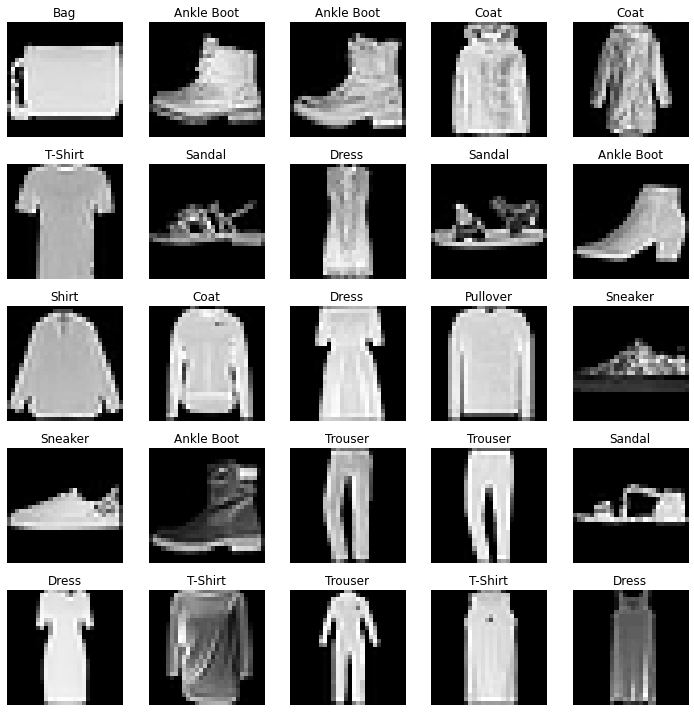

In [4]:
# Data visualization

labels = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}

W_grid = 5
L_grid = 5

fig = plt.figure(figsize=(10, 10))

for i in range(1,W_grid*L_grid+1) :
  random_image = np.random.randint(0,len(x_train))
  img = x_train[random_image]
  label = labels[y_train[random_image]]

  fig.add_subplot(W_grid,L_grid,i)
  plt.title(label)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")

mean=np.mean(x_train)
std=np.std(x_train)

x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

In [6]:
num_classes=10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# FIRST MODEL (SECOND MODEL IN ARTICLE)

model_1=keras.models.Sequential([
    
    keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1,1),
                        activation='relu', input_shape=(28,28,1),
                        padding="same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1,1),
                        activation='relu', padding="same"),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),

    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(10,activation='softmax')  

])

In [8]:
model_1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(lr=0.001),
    metrics=['accuracy']    
)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
history_1=model_1.fit(x_train, y_train, batch_size=128,
                  epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
438/438 [==============================] - 13s 10ms/step - loss: 0.5351 - accuracy: 0.8129 - val_loss: 0.3301 - val_accuracy: 0.8839
Epoch 2/50
438/438 [==============================] - 4s 9ms/step - loss: 0.3535 - accuracy: 0.8741 - val_loss: 0.2810 - val_accuracy: 0.9015
Epoch 3/50
438/438 [==============================] - 4s 9ms/step - loss: 0.3050 - accuracy: 0.8914 - val_loss: 0.2583 - val_accuracy: 0.9041
Epoch 4/50
438/438 [==============================] - 4s 9ms/step - loss: 0.2729 - accuracy: 0.9002 - val_loss: 0.2456 - val_accuracy: 0.9115
Epoch 5/50
438/438 [==============================] - 4s 10ms/step - loss: 0.2517 - accuracy: 0.9076 - val_loss: 0.2374 - val_accuracy: 0.9151
Epoch 6/50
438/438 [==============================] - 4s 9ms/step - loss: 0.2352 - accuracy: 0.9137 - val_loss: 0.2325 - val_accuracy: 0.9142
Epoch 7/50
438/438 [==============================] - 4s 9ms/step - loss: 0.2194 - accuracy: 0.9183 - val_loss: 0.2271 - val_accuracy: 0.9176
Epo

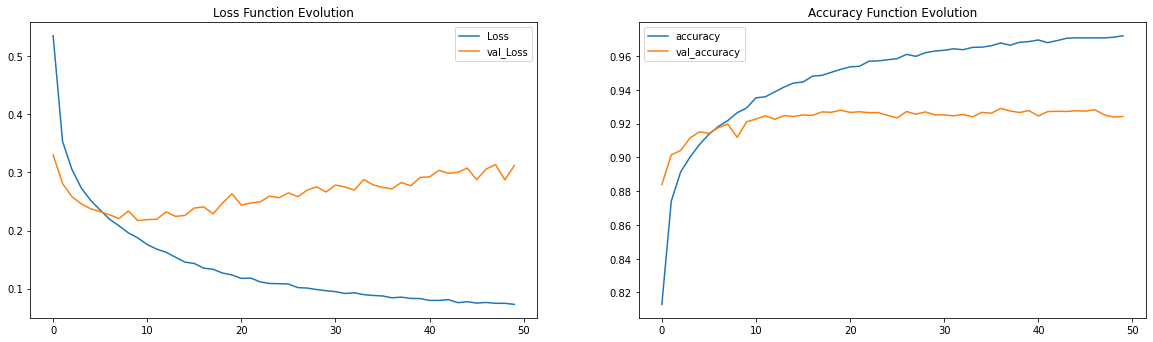

In [10]:
plt.figure(figsize=(20,25))

plt.subplot(4, 2, 1)
plt.plot(history_1.history['loss'], label='Loss')
plt.plot(history_1.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history_1.history['accuracy'], label='accuracy')
plt.plot(history_1.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [11]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model_1.predict(x_test),axis=1)
print('\naccuracy of first model = ',accuracy_score(y_test_arg, Y_pred),"\n")
print('recall of first model = ',recall_score(y_test_arg, Y_pred,average='macro'),'\n')
print('f1 of first model =',f1_score(y_test_arg, Y_pred,average='macro'),'\n')
print('precision of first model = ',precision_score(y_test_arg, Y_pred,average='macro'))

438/438 [==============================] - 1s 2ms/step

accuracy of first model =  0.9242142857142858 

recall of first model =  0.924089685087073 

f1 of first model = 0.924073125462311 

precision of first model =  0.9242183011402867


438/438 [==============================] - 1s 2ms/step


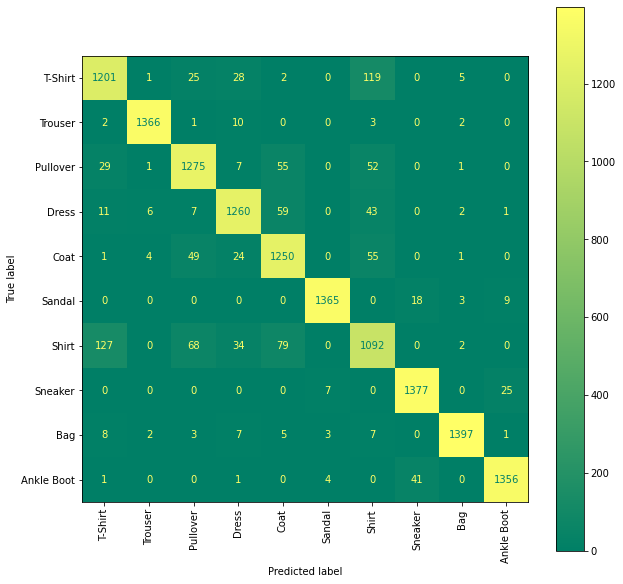

In [12]:
labels = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal','Shirt', 'Sneaker','Bag','Ankle Boot']

y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model_1.predict(x_test),axis=1)
cm = confusion_matrix(y_test_arg, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [13]:
# SECOND MODEL (FOURTH MODEL IN ARTICLE)

model_2=keras.models.Sequential([
    
    keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1,1),
                        activation='relu', input_shape=(28,28,1),
                        padding="same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1,1),
                        activation='relu', padding="same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1,1),
                        activation='relu', padding="same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=(1,1),
                        activation='relu', padding="same"),
    keras.layers.Dropout(0.25),         

    keras.layers.Flatten(),

    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(10,activation='softmax')  

])

In [14]:
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(lr=0.001),
    metrics=['accuracy']    
)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
history_2=model_2.fit(x_train, y_train, batch_size=128,
                  epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
438/438 [==============================] - 5s 10ms/step - loss: 0.8457 - accuracy: 0.6841 - val_loss: 0.5030 - val_accuracy: 0.8113
Epoch 2/50
438/438 [==============================] - 4s 9ms/step - loss: 0.5206 - accuracy: 0.8091 - val_loss: 0.3872 - val_accuracy: 0.8611
Epoch 3/50
438/438 [==============================] - 4s 9ms/step - loss: 0.4402 - accuracy: 0.8394 - val_loss: 0.3373 - val_accuracy: 0.8799
Epoch 4/50
438/438 [==============================] - 4s 10ms/step - loss: 0.3975 - accuracy: 0.8557 - val_loss: 0.3027 - val_accuracy: 0.8903
Epoch 5/50
438/438 [==============================] - 4s 10ms/step - loss: 0.3676 - accuracy: 0.8658 - val_loss: 0.3052 - val_accuracy: 0.8868
Epoch 6/50
438/438 [==============================] - 4s 10ms/step - loss: 0.3503 - accuracy: 0.8727 - val_loss: 0.2805 - val_accuracy: 0.8990
Epoch 7/50
438/438 [==============================] - 4s 9ms/step - loss: 0.3362 - accuracy: 0.8782 - val_loss: 0.2695 - val_accuracy: 0.9016
Ep

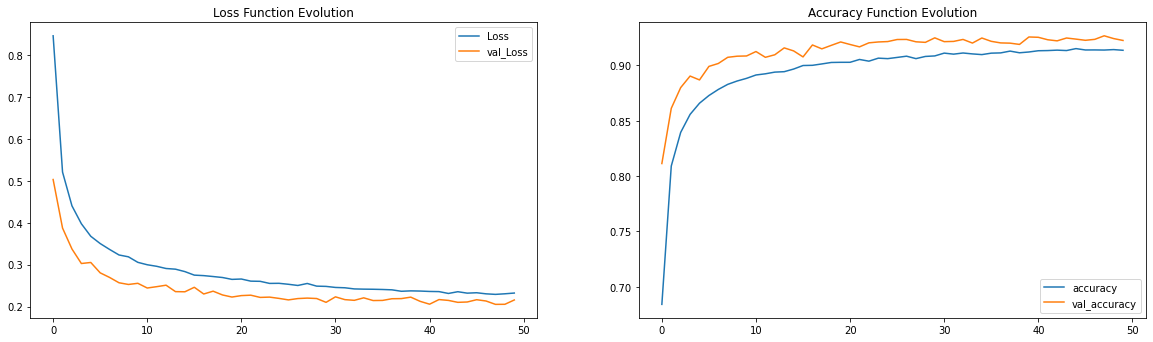

In [16]:
plt.figure(figsize=(20,25))

plt.subplot(4, 2, 1)
plt.plot(history_2.history['loss'], label='Loss')
plt.plot(history_2.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history_2.history['accuracy'], label='accuracy')
plt.plot(history_2.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [17]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model_2.predict(x_test),axis=1)
print('\naccuracy of second model = ',accuracy_score(y_test_arg, Y_pred),"\n")
print('recall of second model = ',recall_score(y_test_arg, Y_pred,average='macro'),'\n')
print('f1 of second model =',f1_score(y_test_arg, Y_pred,average='macro'),'\n')
print('precision of second model = ',precision_score(y_test_arg, Y_pred,average='macro'))

438/438 [==============================] - 1s 2ms/step

accuracy of second model =  0.9224285714285714 

recall of second model =  0.9223482003118919 

f1 of second model = 0.92210347646395 

precision of second model =  0.922329647823147


438/438 [==============================] - 1s 2ms/step


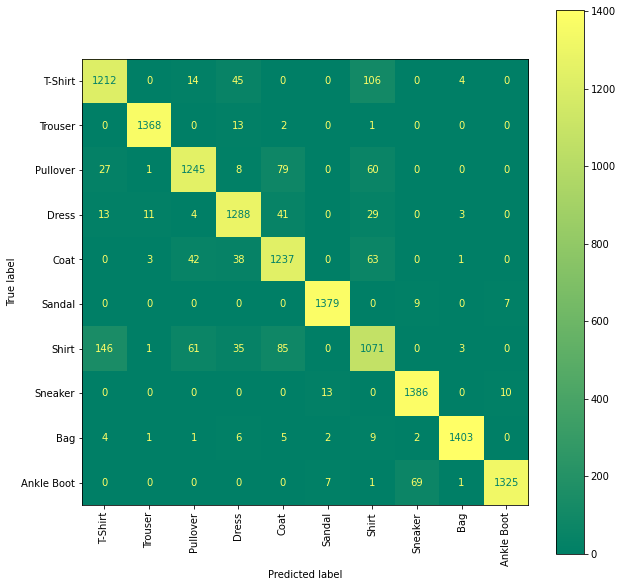

In [18]:
labels = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal','Shirt', 'Sneaker','Bag','Ankle Boot']
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model_2.predict(x_test),axis=1)
cm = confusion_matrix(y_test_arg, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()